In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

# Распределение Лапласа
#### https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%9B%D0%B0%D0%BF%D0%BB%D0%B0%D1%81%D0%B0
#### Генерация выборок из распределения Лапласа:

In [12]:
 # Лаплас с параметрами alpha и beta
alpha = -2.
beta = 2.
Laplace_rv = sts.laplace(alpha,beta)
 # Генерация выборки V = 1000
Value_Laplace_rv = Laplace_rv.rvs(1000)

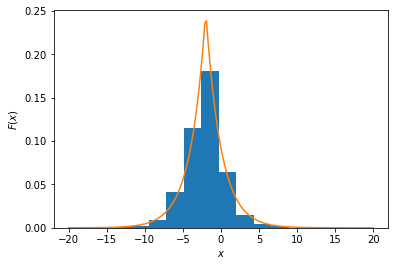

In [13]:
# Гистограмма выборки
plt.hist(Value_Laplace_rv, normed=True)
plt.ylabel('$F(x)$')
plt.xlabel('$x$')
# на том же графике построим теоретическую плотность распределения:
Theoretical_Laplace_rv = np.linspace(-20,20,200)
Theoretical_pdf = Laplace_rv.pdf(Theoretical_Laplace_rv)
#график плотности распределения
plt.plot(Theoretical_Laplace_rv, Theoretical_pdf)

In [14]:
average = Laplace_rv.mean()#среднее
print "среднее",average
dispersion = Laplace_rv.var()#диспресия
print "дисперсия",dispersion

среднее -2.0
дисперсия 8.0


In [15]:
# центральная предельная теорема - Central limit theorem
# func - выбранное распределение
# n - число выборок
def Clt(func,n):
    val = np.linspace(-20,20,200)
    #нормально распределенная случайная величина
    norm_func = sts.norm(func.mean(),func.var()/n)
    norm_pdf = norm_func.pdf(val)
    
    result = []#результат по n выборкам
    for i in xrange(0,1000):
        res = func.rvs(n)
        result.append(res.mean())
        
    plt.hist(result,normed = True)
    plt.plot(val,norm_pdf)
        

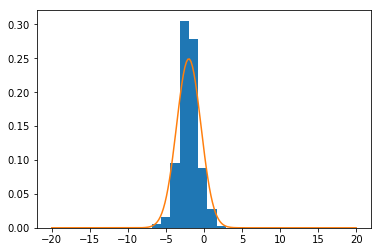

In [16]:
Clt(Laplace_rv,5)#выборка объема 5

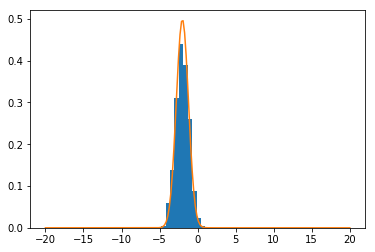

In [17]:
Clt(Laplace_rv,10)#выборка объема 10

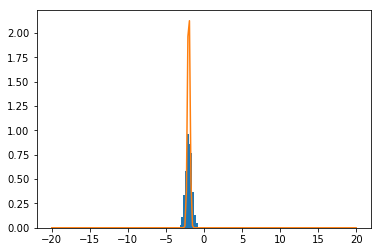

In [18]:
Clt(Laplace_rv,50)#выборка объема 50

Вывод: можно заметить, что с ростом числа n гистограмма становится все более гладкой и все более похожей на нормальное. Т.о. ЦПТ в данном случае работает.